### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style("whitegrid")

In [2]:
os.listdir("./Data/Keuangan")

['CashFromFinancing(TTM).csv', 'ebitda.csv', 'income.csv', 'Revenue(TTM).csv']

In [3]:
# Revenue data
revenue = pd.read_csv("./Data/Keuangan/Revenue(TTM).csv")

# Cash from financing data
cff = pd.read_csv("./Data/Keuangan/CashFromFinancing(TTM).csv")

### Data Preparation

In [4]:
revenue.info() #cff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    21 non-null     object
 1   Value   21 non-null     object
dtypes: object(2)
memory usage: 464.0+ bytes


In [5]:
# Konversi kolom Date menjadi bertipe data datetime
revenue["Date"] = pd.to_datetime(revenue["Date"])
cff["Date"] = pd.to_datetime(cff["Date"])

# Kolom Date menjadi index dataframe
revenue = revenue.set_index("Date")
revenue = revenue.rename(columns={"Value": "Revenue"})

cff = cff.set_index("Date")
cff = cff.rename(columns={"Value": "Cash From Financing"})

In [6]:
revenue.head()

,Revenue
Date,
2017-06-30,374.48M
2017-09-30,378.05M
2017-12-31,414.19M
2018-03-31,475.29M
2018-06-30,557.52M


In [7]:
# Menggabungkan dataframe revenue dan cff
combined = pd.concat([revenue, cff], axis=1, join="inner")
combined.head()

,Revenue,Cash From Financing
Date,,
2017-06-30,374.48M,NaN
2017-09-30,378.05M,NaN
2017-12-31,414.19M,1.624B
2018-03-31,475.29M,1.266B
2018-06-30,557.52M,1.542B


In [8]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2017-06-30 to 2022-06-30
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Revenue              21 non-null     object
 1   Cash From Financing  19 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [9]:
combined = combined.dropna()

Kolom **Revenue** dan **Cash From Financing** tidak bertipe data numerik.

In [10]:
def text_to_num(text):
    
    # Konversi M ke jutaan dan B ke miliaran
    num_dict = {"M": 6, "B": 9}
    zero = "0"
    # Menghilangkan titik
    converted_text = text.replace(".", "")
    print(converted_text)
    
    for symbol in num_dict.keys():
        if symbol in text:
            converted_text = text.replace(symbol, "")
            converted_text = converted_text.split(".")
            last_num = converted_text[-1]
            converted_text = "".join(converted_text)
            print(converted_text)
            zeroes = zero * (num_dict[symbol] - len(last_num))
            converted_text += zeroes
            print(converted_text)
            
    return int(converted_text)

In [11]:
new_combined = combined.copy()

for column in combined.columns:
    new_combined[column] = new_combined[column].apply(text_to_num)

41419M
41419
414190000
47529M
47529
475290000
55752M
55752
557520000
66835M
66835
668350000
82697M
82697
826970000
1024B
1024
1024000000
1276B
1276
1276000000
1681B
1681
1681000000
2175B
2175
2175000000
2538B
2538
2538000000
2984B
2984
2984000000
3586B
3586
3586000000
4376B
4376
4376000000
5424B
5424
5424000000
6823B
6823
6823000000
8300B
8300
8300000000
9955B
9955
9955000000
1109B
1109
11090000000
1175B
1175
11750000000
1624B
1624
1624000000
1266B
1266
1266000000
1542B
1542
1542000000
1473B
1473
1473000000
54663M
54663
546630000
2075B
2075
2075000000
1534B
1534
1534000000
1536B
1536
1536000000
2580B
2580
2580000000
1027B
1027
1027000000
1903B
1903
1903000000
1898B
1898
1898000000
3802B
3802
3802000000
3869B
3869
3869000000
3127B
3127
3127000000
9965B
9965
9965000000
7402B
7402
7402000000
7502B
7502
7502000000
7661B
7661
7661000000


### Plotting into the Graph

In [12]:
combined.head()

,Revenue,Cash From Financing
Date,,
2017-12-31,414.19M,1.624B
2018-03-31,475.29M,1.266B
2018-06-30,557.52M,1.542B
2018-09-30,668.35M,1.473B
2018-12-31,826.97M,546.63M


<AxesSubplot:xlabel='Date'>

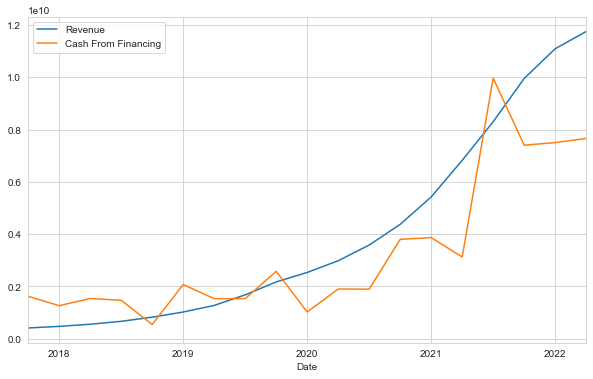

In [13]:
new_combined.plot(figsize=(10,6))

**Insight**:<br>
Sea Limited sedang memprioritaskan keuntungan daripada pertumbuhan karena perubahan pasar keuangan global yang cepat. 

Sea Limited berkembang lebih cepat, tetapi sangat tergantung pada aktivitas kas pendanaan, seperti yang dapat dilihat pada grafik di atas. Akan tetapi, hal itu tidak dapat bertahan lama karena lingkungan ekonomi makro yang berbeda.

In [14]:
new_combined.to_csv(os.path.join("Output", "revenue_cff.csv"))

### Insight Lainnya

#### EBITDA

In [15]:
os.listdir("./Data/Keuangan")

['CashFromFinancing(TTM).csv', 'ebitda.csv', 'income.csv', 'Revenue(TTM).csv']

In [16]:
ebitda = pd.read_csv(os.path.join("./Data/Keuangan", 'ebitda.csv'))

In [17]:
ebitda = ebitda.set_index("Date")
ebitda.head()

,Value
Date,
3/31/2021,-348.413
6/30/2021,-334.016
9/30/2021,-458.556
12/31/2021,-442.074
3/31/2022,-498.032


Text(0, 0.5, 'EBITDA ($)')

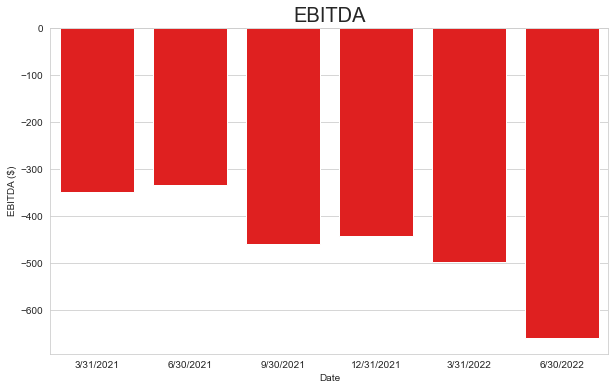

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=ebitda.index, y=ebitda["Value"], color="red")
plt.title("EBITDA", fontsize=20)
plt.ylabel("EBITDA ($)")

In [19]:
ebitda.to_csv(os.path.join("Output", "ebitda.csv"))

**Insight**:<br><br>
**CEO Forrest Li said that narrower loss indicated Shopee was "well on track to achieve positive adjusted EBITDA before allocation of HQ costs in the region.** <br>

Pernyataan tersebut terbalik dengan prediksi yang ada

#### Income Statement

In [20]:
# Nilai dalam ribuan

income = pd.read_csv(os.path.join("./Data/Keuangan", 'income.csv'))
income.head()

,Date,Total Revenue,Operating Expense,Selling & Marketing Expense
0,9/29/2021,2688884,1467260,1009601
1,12/30/2021,3222114,1752803,1219858
2,3/30/2022,2899571,1668060,1005174
3,6/29/2022,2942599,1749634,973767


In [21]:
income[["Total Revenue", "Operating Expense", "Selling & Marketing Expense"]] = income[["Total Revenue", "Operating Expense", "Selling & Marketing Expense"]].astype(int)
new_income = income.copy()

In [22]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         4 non-null      object
 1   Total Revenue                4 non-null      int32 
 2   Operating Expense            4 non-null      int32 
 3   Selling & Marketing Expense  4 non-null      int32 
dtypes: int32(3), object(1)
memory usage: 208.0+ bytes


In [23]:
income = income.iloc[:,:-1]

income["Date"] = pd.to_datetime(income["Date"])
income = income.set_index("Date")
new_income = new_income.set_index("Date")

In [24]:
income.head()

,Total Revenue,Operating Expense
Date,,
2021-09-29,2688884,1467260
2021-12-30,3222114,1752803
2022-03-30,2899571,1668060
2022-06-29,2942599,1749634


In [25]:
new_income.head()

,Total Revenue,Operating Expense,Selling & Marketing Expense
Date,,,
9/29/2021,2688884,1467260,1009601
12/30/2021,3222114,1752803,1219858
3/30/2022,2899571,1668060,1005174
6/29/2022,2942599,1749634,973767


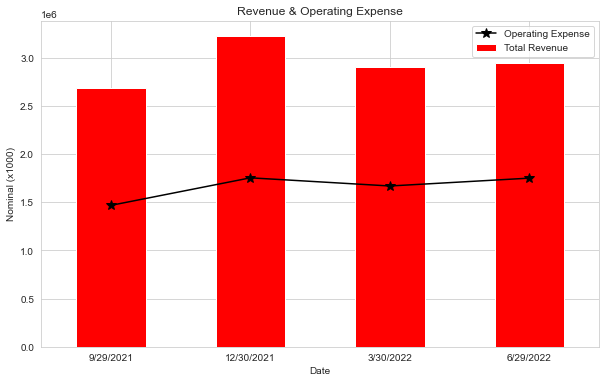

In [26]:
plt.figure(figsize=(10,6))
new_income["Total Revenue"].plot(kind="bar", color="red", label="Total Revenue")
new_income["Operating Expense"].plot(kind="line", marker='*', color='black', ms=10, label="Operating Expense")
plt.title("Revenue & Operating Expense")
plt.ylabel("Nominal (x1000)")
plt.legend()
plt.show()

In [27]:
income.to_csv(os.path.join("Output", "income.csv"))

**Insight**:

Revenue mulai menurun pada akhir tahun 2021, sedangkan biaya operasi stabil saja. Hal ini mengindikasikan biaya operasi yang dikeluarkan oleh SEA Limited, termasuk biaya marketing sangat besar, yakni melebihi 50% dari revenue.

In [28]:
expenses = pd.read_csv(os.path.join("./Data/Keuangan", 'income.csv'))
expenses = expenses.drop("Total Revenue", axis=1)
expenses.head()

,Date,Operating Expense,Selling & Marketing Expense
0,9/29/2021,1467260,1009601
1,12/30/2021,1752803,1219858
2,3/30/2022,1668060,1005174
3,6/29/2022,1749634,973767


In [29]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         4 non-null      object
 1   Operating Expense            4 non-null      int64 
 2   Selling & Marketing Expense  4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [30]:
new_expenses = expenses.copy()
expenses["Date"] = pd.to_datetime(expenses["Date"])
expenses = expenses.set_index("Date")
expenses.head()

,Operating Expense,Selling & Marketing Expense
Date,,
2021-09-29,1467260,1009601
2021-12-30,1752803,1219858
2022-03-30,1668060,1005174
2022-06-29,1749634,973767


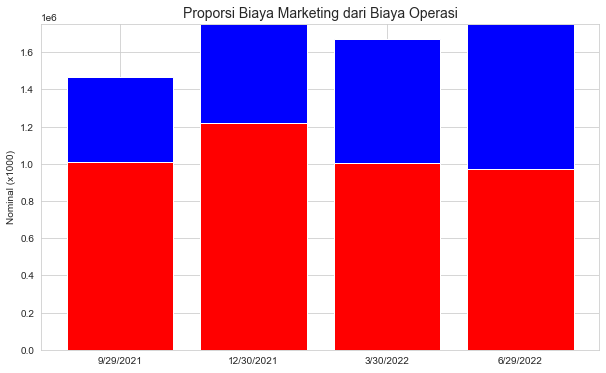

In [31]:
x = new_expenses["Date"]
y1 = new_expenses["Operating Expense"]
y2 = new_expenses["Selling & Marketing Expense"]

plt.figure(figsize=(10,6))
plt.bar(x, y1, color='r')
plt.bar(x, y2-y1, bottom=y1, color='b')
plt.title("Proporsi Biaya Marketing dari Biaya Operasi", fontsize=14)
plt.ylabel("Nominal (x1000)")
plt.show()

In [33]:
expenses.to_csv(os.path.join("Output", "expenses.csv"))

**Insight**:<br>
70% Biaya operasi digunakan untuk biaya marketing, sehingga memang benar bahwa pengeluaran dari SEA Limited sangat banyak meskipun sedang terdampak kemunduran.